# TOMATO

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings('ignore')

# Data load

In [2]:
tomato = pd.read_csv("./data_tomato.csv", sep=",") 

# Data Smoothing

In [3]:
sdata = tomato
sdata['sCG'] = 0 
sdata['sCHG'] = 0 
sdata['sCHH'] = 0 
sdata['srec'] = 0 

# Simple exponential smoothing at 0.9  
for i in  range(1, len(sdata)):
    if sdata.loc[i-1,'chr'] == sdata.loc[i,'chr']:
        sdata.loc[i, 'sCG'] = sdata.loc[i-1, 'CG']*0.1 + sdata.loc[i-1, 'sCG']*0.9
        sdata.loc[i, 'sCHG'] = sdata.loc[i-1, 'CHG']*0.1 + sdata.loc[i-1, 'sCHG']*0.9
        sdata.loc[i, 'sCHH'] = sdata.loc[i-1, 'CHH']*0.1 + sdata.loc[i-1, 'sCHH']*0.9  
        sdata.loc[i, 'srec'] = sdata.loc[i-1, 'rec']*0.1 + sdata.loc[i-1, 'srec']*0.9  

# Object Creation

In [4]:
# Dataframes with chromosomes info
chr1 = sdata[sdata["chr"] == "chr1"]
chr2 = sdata[sdata["chr"] == "chr2"]
chr3 = sdata[sdata["chr"] == "chr3"]
chr4 = sdata[sdata["chr"] == "chr4"]
chr5 = sdata[sdata["chr"] == "chr5"]
chr6 = sdata[sdata["chr"] == "chr6"]
chr7 = sdata[sdata["chr"] == "chr7"]
chr8 = sdata[sdata["chr"] == "chr8"]
chr9 = sdata[sdata["chr"] == "chr9"]
chr10 = sdata[sdata["chr"] == "chr10"]
chr11 = sdata[sdata["chr"] == "chr11"]
chr12 = sdata[sdata["chr"] == "chr12"]

In [5]:
# Dataframes with the remaining chromosomes info
achr1 = sdata[sdata["chr"] != "chr1"]
achr2 = sdata[sdata["chr"] != "chr2"]
achr3 = sdata[sdata["chr"] != "chr3"]
achr4 = sdata[sdata["chr"] != "chr4"]
achr5 = sdata[sdata["chr"] != "chr5"]
achr6 = sdata[sdata["chr"] != "chr6"]
achr7 = sdata[sdata["chr"] != "chr7"]
achr8 = sdata[sdata["chr"] != "chr8"]
achr9 = sdata[sdata["chr"] != "chr9"]
achr10 = sdata[sdata["chr"] != "chr10"]
achr11 = sdata[sdata["chr"] != "chr11"]
achr12 = sdata[sdata["chr"] != "chr12"]

# Predictions on one chromosome using the remaining

Correlation: 0.8942615819995506
Coefficient of Determination: 0.7595293073989466
Mean Squared Error: 0.012895791045323677


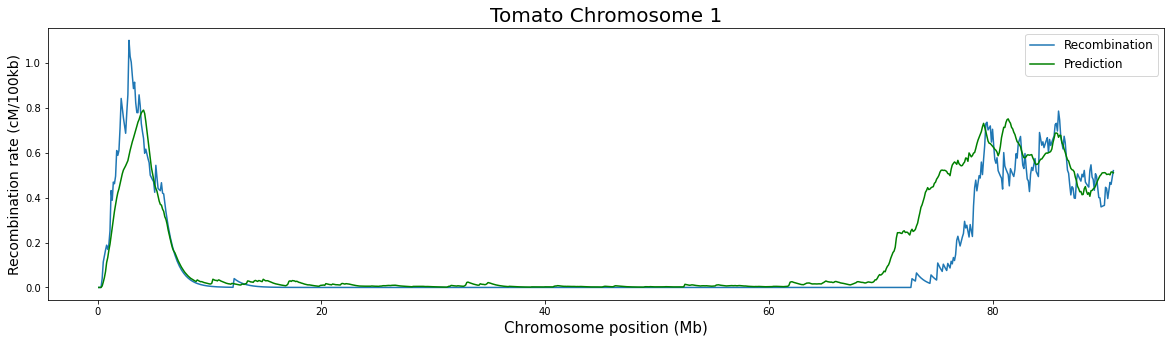

In [6]:
# TRAINING MODEL
X = achr1[['sCG','sCHG','sCHH']]
y = achr1[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr1[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr1 = model_spreds      
    
#PARAMETERS
corr_chr1 = pearsonr(chr1.srec, pchr1)
r2_chr1 = r2_score(chr1.srec, pchr1)
mse_chr1 = mean_squared_error(chr1.srec, pchr1)
print('Correlation:', corr_chr1[0])
print('Coefficient of Determination:', r2_chr1)
print('Mean Squared Error:', mse_chr1)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr1.window_end,chr1.srec, label='Recombination')
ax.plot(chr1.window_end,pchr1, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 1',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.9579571326050591
Coefficient of Determination: 0.8431339989459885
Mean Squared Error: 0.012301975244412401


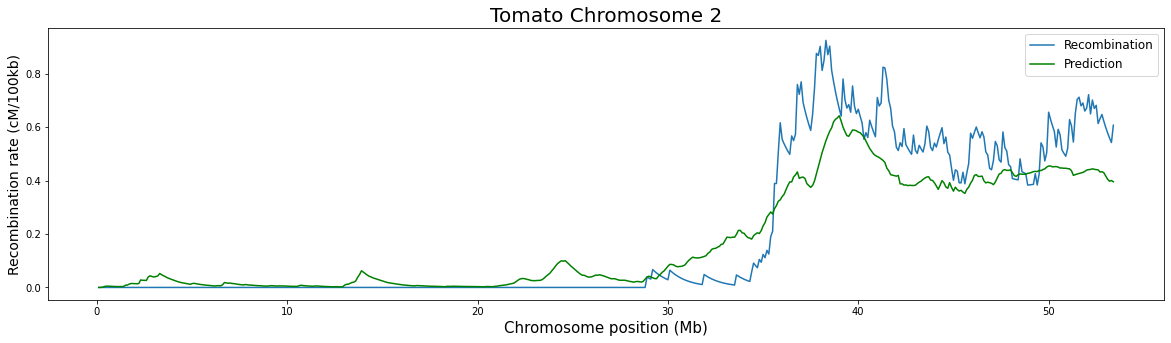

In [7]:
# TRAINING MODEL
X = achr2[['sCG','sCHG','sCHH']]
y = achr2[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr2[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr2 = model_spreds      
    
#PARAMETERS
corr_chr2 = pearsonr(chr2.srec, pchr2)
r2_chr2 = r2_score(chr2.srec, pchr2)
mse_chr2 = mean_squared_error(chr2.srec, pchr2)
print('Correlation:', corr_chr2[0])
print('Coefficient of Determination:', r2_chr2)
print('Mean Squared Error:', mse_chr2)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr2.window_end,chr2.srec, label='Recombination')
ax.plot(chr2.window_end,pchr2, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 2',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.8878675433163237
Coefficient of Determination: 0.7833259007849461
Mean Squared Error: 0.015710034193533305


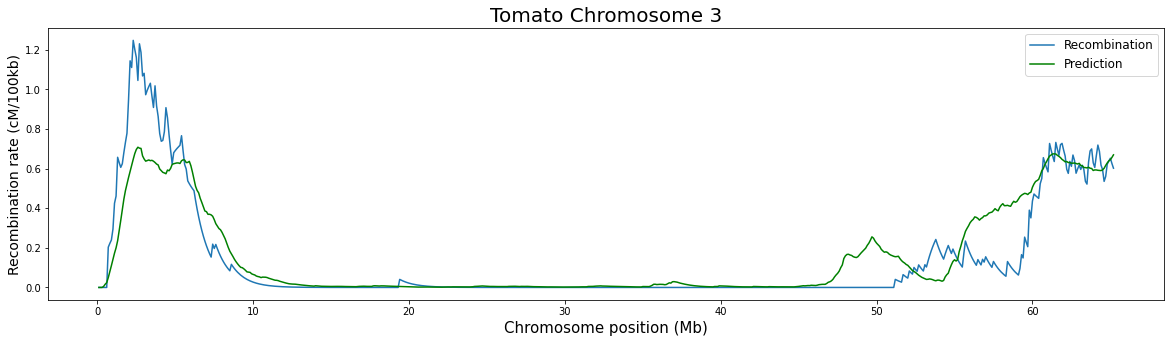

In [8]:
# TRAINING MODEL
X = achr3[['sCG','sCHG','sCHH']]
y = achr3[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr3[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr3 = model_spreds      
    
#PARAMETERS
corr_chr3 = pearsonr(chr3.srec, pchr3)
r2_chr3 = r2_score(chr3.srec, pchr3)
mse_chr3 = mean_squared_error(chr3.srec, pchr3)
print('Correlation:', corr_chr3[0])
print('Coefficient of Determination:', r2_chr3)
print('Mean Squared Error:', mse_chr3)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr3.window_end,chr3.srec, label='Recombination')
ax.plot(chr3.window_end,pchr3, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 3',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.873217702379085
Coefficient of Determination: 0.7567530758209987
Mean Squared Error: 0.015465834250177682


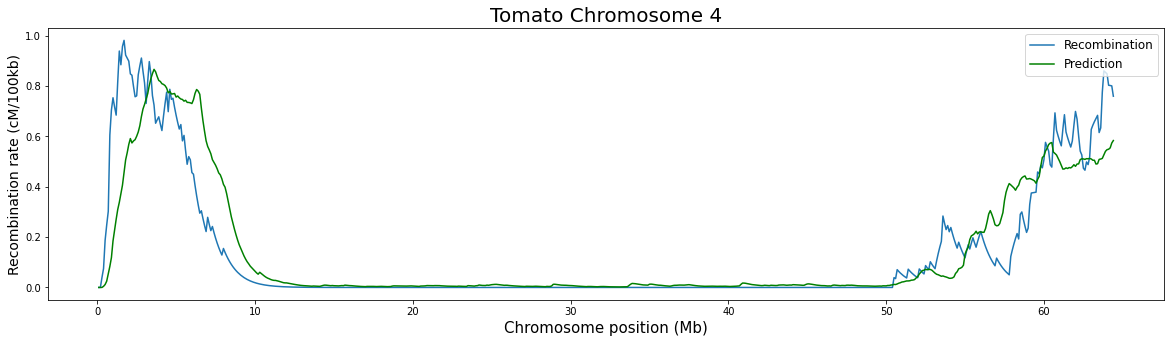

In [9]:
# TRAINING MODEL
X = achr4[['sCG','sCHG','sCHH']]
y = achr4[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr4[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr4 = model_spreds      
    
#PARAMETERS
corr_chr4 = pearsonr(chr4.srec, pchr4)
r2_chr4 = r2_score(chr4.srec, pchr4)
mse_chr4 = mean_squared_error(chr4.srec, pchr4)
print('Correlation:', corr_chr4[0])
print('Coefficient of Determination:', r2_chr4)
print('Mean Squared Error:', mse_chr4)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr4.window_end,chr4.srec, label='Recombination')
ax.plot(chr4.window_end,pchr4, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 4',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.8850935390674652
Coefficient of Determination: 0.7368013052018637
Mean Squared Error: 0.025167008747273248


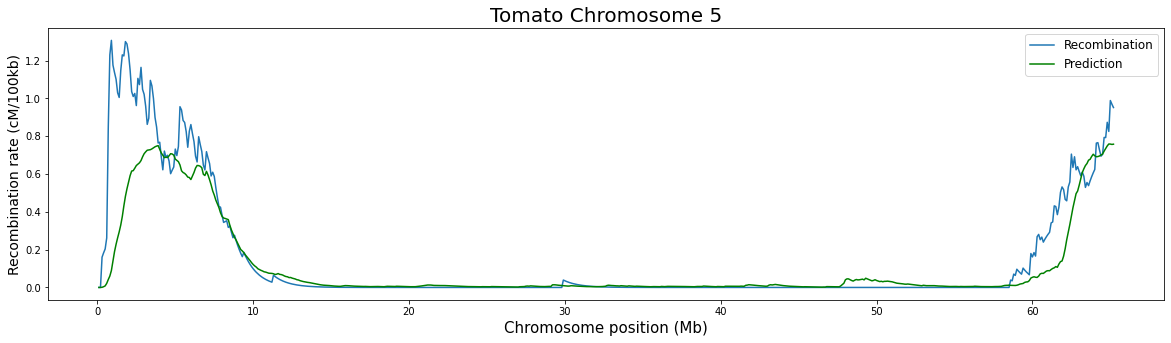

In [10]:
# TRAINING MODEL
X = achr5[['sCG','sCHG','sCHH']]
y = achr5[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr5[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr5 = model_spreds      
    
#PARAMETERS
corr_chr5 = pearsonr(chr5.srec, pchr5)
r2_chr5 = r2_score(chr5.srec, pchr5)
mse_chr5 = mean_squared_error(chr5.srec, pchr5)
print('Correlation:', corr_chr5[0])
print('Coefficient of Determination:', r2_chr5)
print('Mean Squared Error:', mse_chr5)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr5.window_end,chr5.srec, label='Recombination')
ax.plot(chr5.window_end,pchr5, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 5',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.825875118583534
Coefficient of Determination: 0.532364714057408
Mean Squared Error: 0.014653379232635197


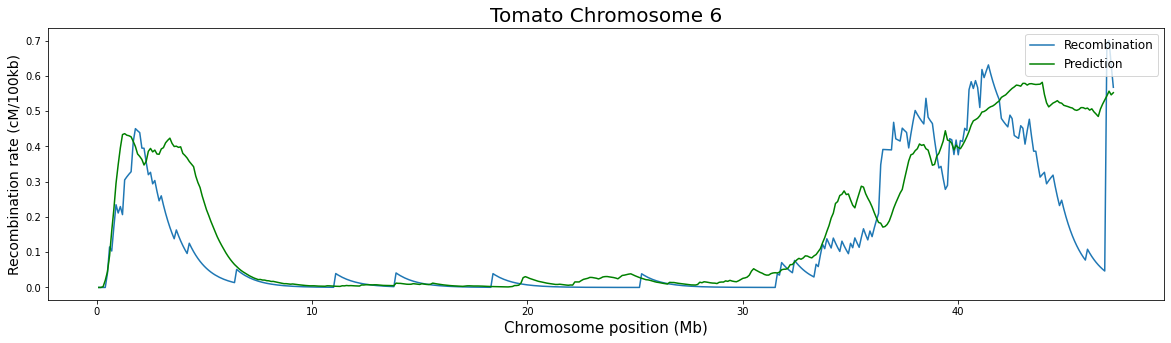

In [11]:
# TRAINING MODEL
X = achr6[['sCG','sCHG','sCHH']]
y = achr6[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr6[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr6 = model_spreds      
    
#PARAMETERS
corr_chr6 = pearsonr(chr6.srec, pchr6)
r2_chr6 = r2_score(chr6.srec, pchr6)
mse_chr6 = mean_squared_error(chr6.srec, pchr6)
print('Correlation:', corr_chr6[0])
print('Coefficient of Determination:', r2_chr6)
print('Mean Squared Error:', mse_chr6)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr6.window_end,chr6.srec, label='Recombination')
ax.plot(chr6.window_end,pchr6, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 6',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.8872811956593092
Coefficient of Determination: 0.7604301871265526
Mean Squared Error: 0.01716812106354583


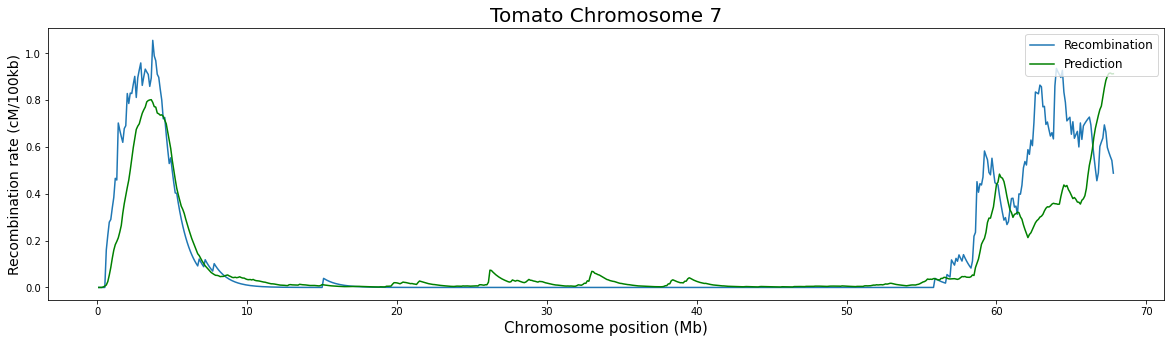

In [12]:
# TRAINING MODEL
X = achr7[['sCG','sCHG','sCHH']]
y = achr7[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr7[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr7 = model_spreds      
    
#PARAMETERS
corr_chr7 = pearsonr(chr7.srec, pchr7)
r2_chr7 = r2_score(chr7.srec, pchr7)
mse_chr7 = mean_squared_error(chr7.srec, pchr7)
print('Correlation:', corr_chr7[0])
print('Coefficient of Determination:', r2_chr7)
print('Mean Squared Error:', mse_chr7)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr7.window_end,chr7.srec, label='Recombination')
ax.plot(chr7.window_end,pchr7, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 7',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.9662013390050254
Coefficient of Determination: 0.9273863853573913
Mean Squared Error: 0.004373068712351567


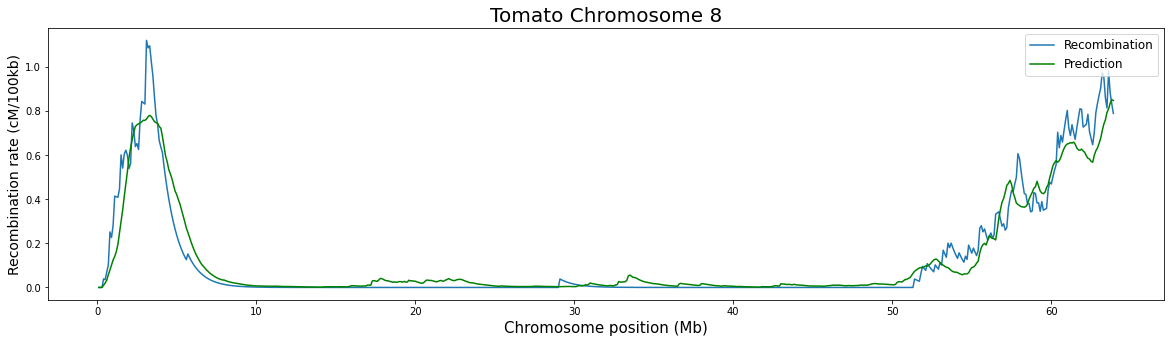

In [13]:
# TRAINING MODEL
X = achr8[['sCG','sCHG','sCHH']]
y = achr8[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr8[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr8 = model_spreds      
    
#PARAMETERS
corr_chr8 = pearsonr(chr8.srec, pchr8)
r2_chr8 = r2_score(chr8.srec, pchr8)
mse_chr8 = mean_squared_error(chr8.srec, pchr8)
print('Correlation:', corr_chr8[0])
print('Coefficient of Determination:', r2_chr8)
print('Mean Squared Error:', mse_chr8)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr8.window_end,chr8.srec, label='Recombination')
ax.plot(chr8.window_end,pchr8, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 8',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.9222989331919194
Coefficient of Determination: 0.8327197686501382
Mean Squared Error: 0.012083304996021645


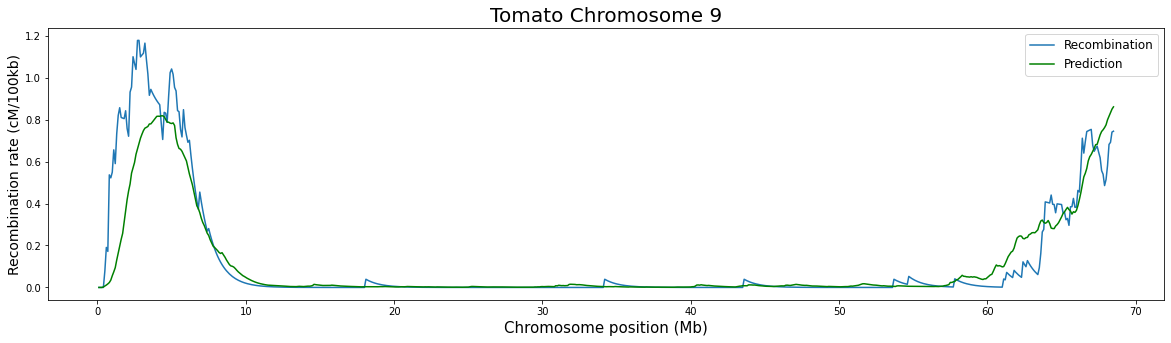

In [14]:
# TRAINING MODEL
X = achr9[['sCG','sCHG','sCHH']]
y = achr9[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr9[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr9 = model_spreds      
    
#PARAMETERS
corr_chr9 = pearsonr(chr9.srec, pchr9)
r2_chr9 = r2_score(chr9.srec, pchr9)
mse_chr9 = mean_squared_error(chr9.srec, pchr9)
print('Correlation:', corr_chr9[0])
print('Coefficient of Determination:', r2_chr9)
print('Mean Squared Error:', mse_chr9)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr9.window_end,chr9.srec, label='Recombination')
ax.plot(chr9.window_end,pchr9, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 9',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.945719884901665
Coefficient of Determination: 0.7882829207789123
Mean Squared Error: 0.023072093901691817


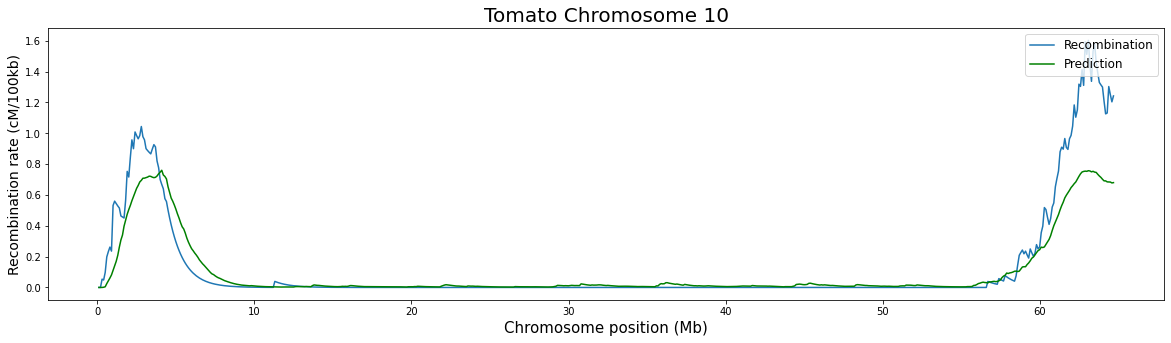

In [15]:
# TRAINING MODEL
X = achr10[['sCG','sCHG','sCHH']]
y = achr10[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr10[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr10 = model_spreds      
    
#PARAMETERS
corr_chr10 = pearsonr(chr10.srec, pchr10)
r2_chr10 = r2_score(chr10.srec, pchr10)
mse_chr10 = mean_squared_error(chr10.srec, pchr10)
print('Correlation:', corr_chr10[0])
print('Coefficient of Determination:', r2_chr10)
print('Mean Squared Error:', mse_chr10)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr10.window_end,chr10.srec, label='Recombination')
ax.plot(chr10.window_end,pchr10, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 10',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.9686275083548488
Coefficient of Determination: 0.9283426337718823
Mean Squared Error: 0.006469711506585654


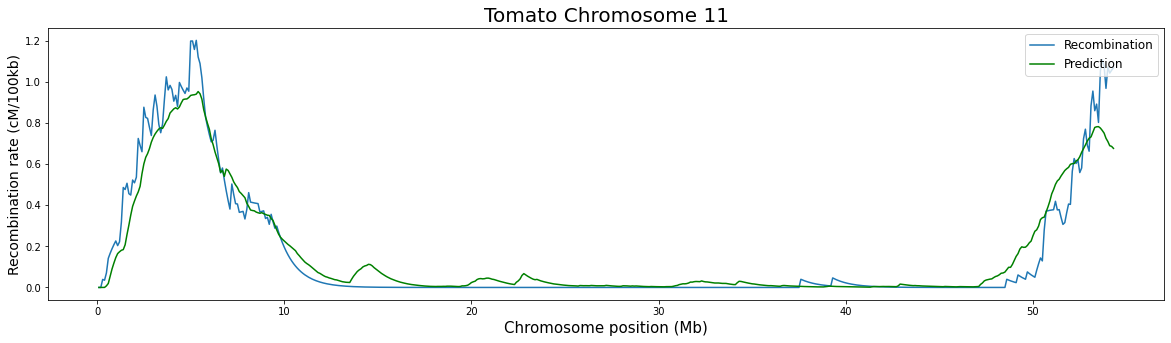

In [16]:
# TRAINING MODEL
X = achr11[['sCG','sCHG','sCHH']]
y = achr11[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr11[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr11 = model_spreds      
    
#PARAMETERS
corr_chr11 = pearsonr(chr11.srec, pchr11)
r2_chr11 = r2_score(chr11.srec, pchr11)
mse_chr11 = mean_squared_error(chr11.srec, pchr11)
print('Correlation:', corr_chr11[0])
print('Coefficient of Determination:', r2_chr11)
print('Mean Squared Error:', mse_chr11)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr11.window_end,chr11.srec, label='Recombination')
ax.plot(chr11.window_end,pchr11, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 11',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.8087577199232209
Coefficient of Determination: 0.5847826276333843
Mean Squared Error: 0.04297351806532676


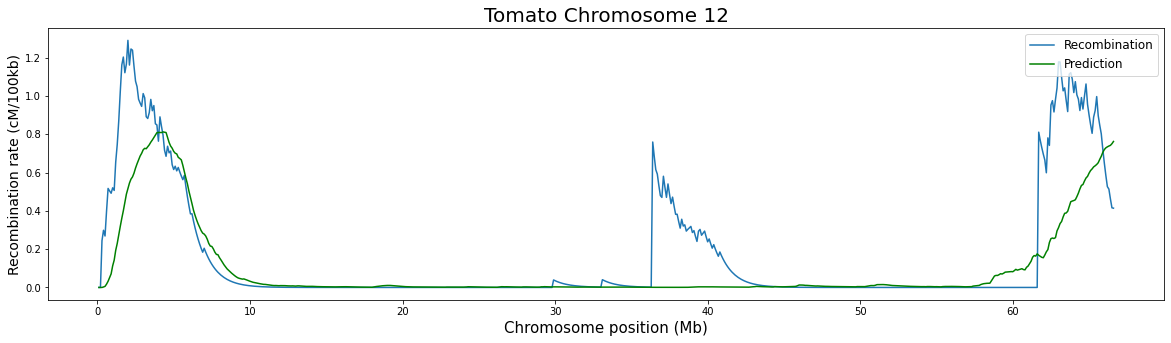

In [17]:
# TRAINING MODEL
X = achr12[['sCG','sCHG','sCHH']]
y = achr12[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr12[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr12 = model_spreds      
    
#PARAMETERS
corr_chr12 = pearsonr(chr12.srec, pchr12)
r2_chr12 = r2_score(chr12.srec, pchr12)
mse_chr12 = mean_squared_error(chr12.srec, pchr12)
print('Correlation:', corr_chr12[0])
print('Coefficient of Determination:', r2_chr12)
print('Mean Squared Error:', mse_chr12)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr12.window_end,chr12.srec, label='Recombination')
ax.plot(chr12.window_end,pchr12, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 12',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

# Compiling Info

In [18]:
corr = pd.DataFrame({'corr':[corr_chr1[0], corr_chr2[0], corr_chr3[0], corr_chr4[0], corr_chr5[0], corr_chr6[0], corr_chr7[0], corr_chr8[0], corr_chr9[0], corr_chr10[0], corr_chr11[0], corr_chr12[0]]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9, r2_chr10, r2_chr11, r2_chr12]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9, mse_chr10, mse_chr11, mse_chr12]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12',]})
results = pd.concat([index, corr, r2, mse], axis=1)
results

,chr,corr,R^2,MSE
0,chr1,0.894262,0.759529,0.012896
1,chr2,0.957957,0.843134,0.012302
2,chr3,0.887868,0.783326,0.015710
3,chr4,0.873218,0.756753,0.015466
4,chr5,0.885094,0.736801,0.025167
5,chr6,0.825875,0.532365,0.014653
6,chr7,0.887281,0.760430,0.017168
7,chr8,0.966201,0.927386,0.004373
8,chr9,0.922299,0.832720,0.012083
9,chr10,0.945720,0.788283,0.023072


In [19]:
results.describe()

,corr,R^2,MSE
count,12.000000,12.000000,12.000000
mean,0.901930,0.769488,0.016861
std,0.052306,0.117508,0.010095
min,0.808758,0.532365,0.004373
25%,0.882125,0.751765,0.012247
50%,0.891065,0.771878,0.015060
75%,0.948779,0.835323,0.018644
max,0.968628,0.928343,0.042974


# SHAP Values

In [20]:
#-------------------------------------------------------------------------------------------------------
X = sdata[['sCG', 'sCHG', 'sCHH']]
y = sdata['srec']

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1)

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

ExtraTreesRegressor()

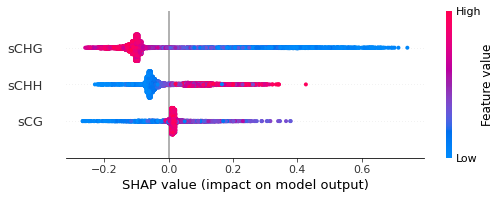

In [21]:
X_frame = pd.DataFrame(data=X)
explainer = shap.Explainer(model)
shap_values = explainer(X_frame)
shap.summary_plot(shap_values, X_frame)

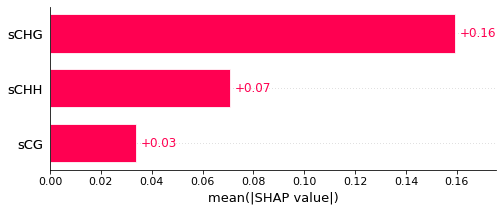

In [22]:
shap.plots.bar(shap_values)